In [1]:
import tensorflow as tf
import numpy as np
import gym
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

Success rate: 0.023
Final Q-Table Values
[[0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.99       0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.87752102 0.        ]
 [0.         0.9801     0.         0.        ]
 [0.         0.         0.         0.        ]]


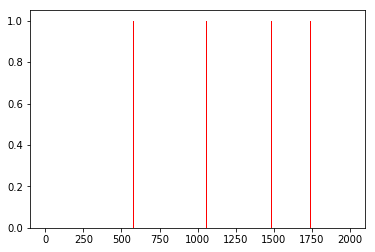

In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register

id='FrozenLake-v0',
entry_00000point='gym.envs.toy_text:FrozenLakeEnv',
kwargs={'map_name': '4x4', 'is_slippery': False}

env = gym.make('FrozenLake-v0')

Q = np.zeros([env.observation_space.n, env.action_space.n])
dis = .99
num_episodes = 2000

rList = []

for i in range(num_episodes):
    state = env.reset()
    rAll = 0
    done = False
    
    while not done:
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i+1))  # 노이즈 추가
        
        new_state, reward, done, _ = env.step(action)
        
        Q[state, action] = reward + dis * np.max(Q[new_state, :])
        
        rAll += reward
        state = new_state
        
    rList.append(rAll)
        

print("Success rate: " + str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print(Q)
plt.bar(range(len(rList)), rList, color='red')
plt.show()

# C-Network, fully connected

In [3]:
import numpy as np
print(np.identity(16)[0:1])
print(np.eye(16)[10:11])

def one_hot(x):
    return np.identity(16)[x:x+1]


#input and output size of "Frozen Lake"
env=gym.make("FrozenLake-v0")
input_s=env.observation_space.n
output_s=env.action_space.n
learning_rate=0.1

# set the feed-forward part of the network

X=tf.placeholder(shape=[1,input_s],dtype=tf.float32)
W=tf.Variable(tf.random_uniform([input_s, output_s],0,0.01))

# Deep Learning: linear regression 
Qpred=tf.matmul(X,W)
Y=tf.placeholder(shape=[1,output_s],dtype=tf.float32)
loss=tf.reduce_sum(tf.square(Y-Qpred))
train=tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)


[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


# Set the Q-learning parameters and network

In [4]:
dis=0.99
episodes=2000
rList=[]

Percentage of successful episoded:0.468%


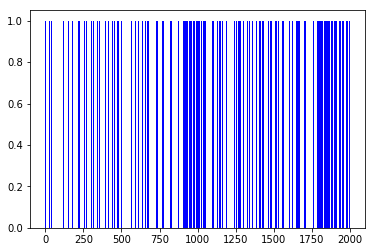

In [5]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(episodes):
        s=env.reset()
        e=1/((i/50)+10)
        rAll=0
        done=False
        local_loss=[]
        
        while not done:
            Qs=sess.run(Qpred,feed_dict={X:one_hot(s)})
            if np.random.rand(1)<e:
                a=env.action_space.sample()
            else:
                a=np.argmax(Qs)
        
        # Get the new state and reward finally
            s1,reward,done,_=env.step(a)
            if done:
                Qs[0,a]=reward
            else:
                Qs1=sess.run(Qpred,feed_dict={X:one_hot(s1)})
                Qs[0,a]=reward + dis*np.max(Qs1)
         
        # train our network usning target Y and Qpred
            sess.run(train,feed_dict={X:one_hot(s), Y:Qs})
            
            rAll+=reward
            s=s1
        rList.append(rAll)
        
    print("Percentage of successful episoded:" + str(sum(rList)/episodes) + "%")
    plt.bar(range(len(rList)),rList,color="blue")
    plt.show()

# the Q-networking training